# Logistic Regression

## Data

An experiment was conducted on 5000 participants to study the effects of age and physical health on hearing loss, specifically the ability to hear high pitched tones. This data displays the result of the study in which participants were evaluated and scored for physical ability and then had to take an audio test (pass/no pass) which evaluated their ability to hear high frequencies. The age of the user was also noted. Is it possible to build a model that would predict someone's liklihood to hear the high frequency sound based solely on their features (age and physical score)?

* Features

    * age - Age of participant in years
    * physical_score - Score achieved during physical exam

* Label/Target

    * test_result - 0 if no pass, 1 if test passed

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('hearing_test.csv')

In [3]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


## Exploratory Data Analysis and Visualization

Feel free to explore the data further on your own.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,5000.0,51.60900,11.287001,18.0,43.0,51.0,60.0,90.0
physical_score,5000.0,32.76026,8.169802,-0.0,26.7,35.3,38.9,50.0
test_result,5000.0,0.60000,0.489947,0.0,0.0,1.0,1.0,1.0


In [6]:
df['test_result'].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

<Axes: xlabel='test_result', ylabel='count'>

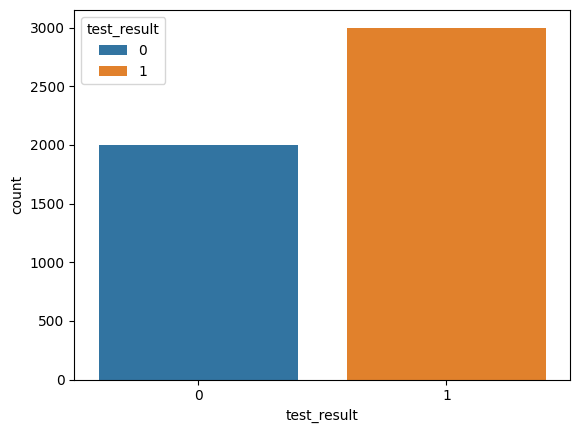

In [7]:
sns.countplot(x=df['test_result'], hue=df['test_result'])

<Axes: xlabel='test_result', ylabel='age'>

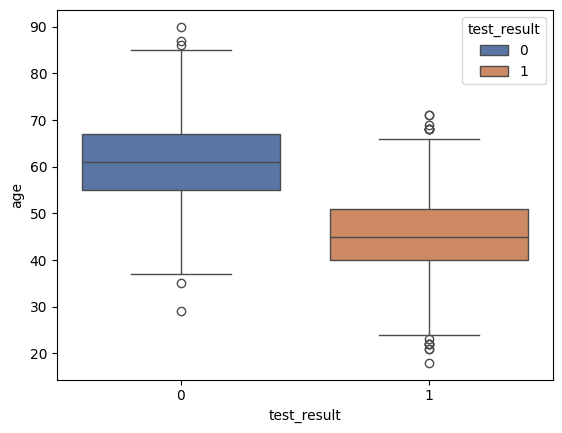

In [8]:
sns.boxplot(data=df, x='test_result', y='age', hue='test_result', palette='deep')

<Axes: xlabel='test_result', ylabel='physical_score'>

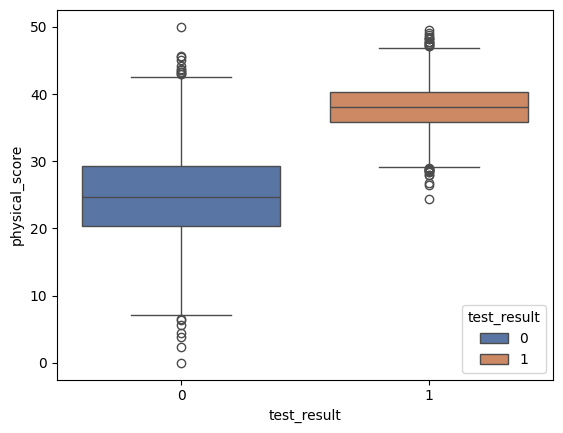

In [9]:
sns.boxplot(x=df['test_result'], y=df['physical_score'], hue=df['test_result'], palette='deep')

**Based on the box plots above, could you guess what feature is more indicative of the test results?**

<Axes: xlabel='age', ylabel='physical_score'>

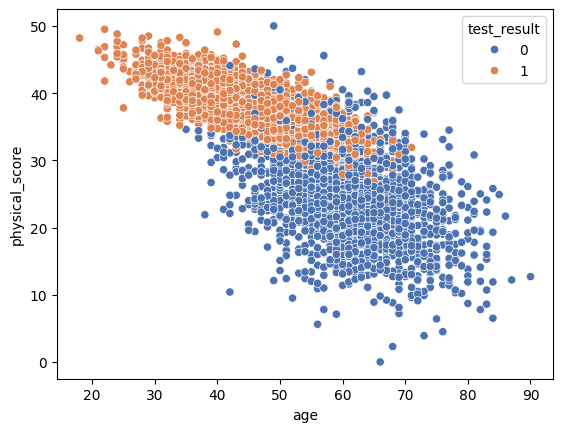

In [10]:
sns.scatterplot(x=df['age'], y=df['physical_score'], hue=df['test_result'], palette='deep')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


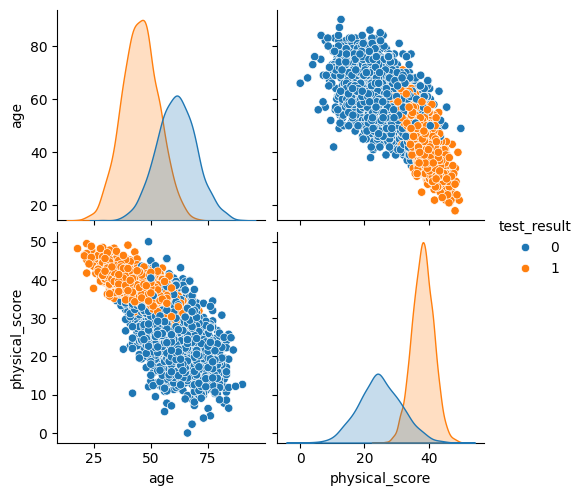

In [11]:
sns.pairplot(data=df, hue='test_result')

In [12]:
df.corr()

,age,physical_score,test_result
age,1.000000,-0.782146,-0.683171
physical_score,-0.782146,1.000000,0.792716
test_result,-0.683171,0.792716,1.000000


<Axes: >

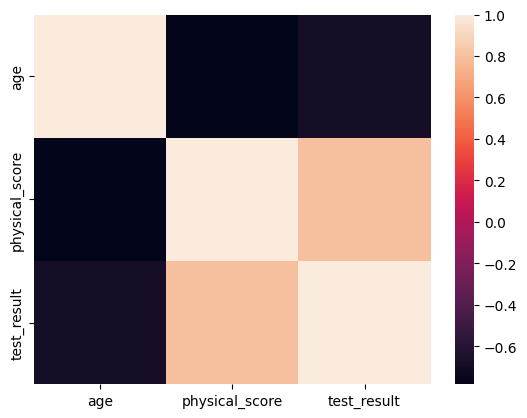

In [13]:
sns.heatmap(df.corr())

<Axes: >

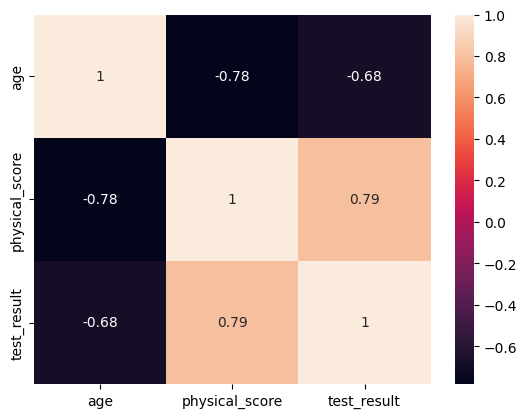

In [14]:
sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='age', ylabel='test_result'>

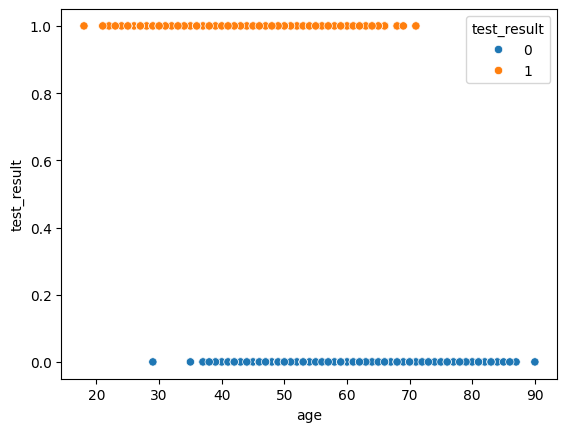

In [15]:
sns.scatterplot(x=df['age'], y=df['test_result'], hue=df['test_result'])

<Axes: xlabel='physical_score', ylabel='test_result'>

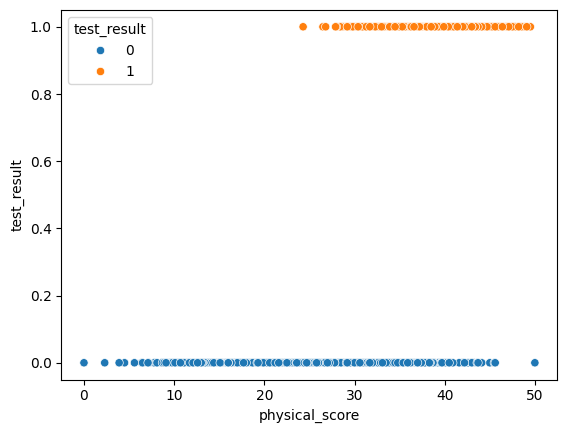

In [16]:
sns.scatterplot(x=df['physical_score'], y=df['test_result'], hue=df['test_result'])

**Easily discover new plot types with a Google search! Searching for "3d matplotlib scatter plot" quickly takes you to: https://matplotlib.org/3.1.1/gallery/mplot3d/scatter3d.html**

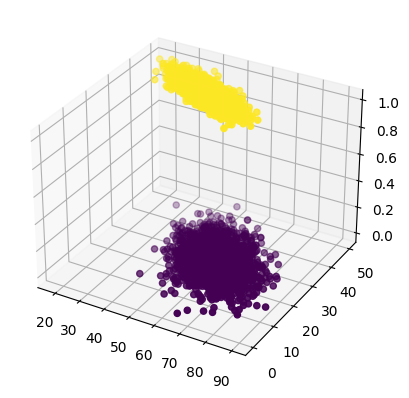

In [17]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'],df['physical_score'],df['test_result'],c=df['test_result'])

# Train | Test Split and Scaling

In [18]:
X = df.drop('test_result', axis=1)
y = df['test_result']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
sc = StandardScaler()

In [23]:
X_train = sc.fit_transform(X_train)

In [24]:
X_test = sc.transform(X_test)

# Logistic Regression Model

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
model = LogisticRegression()

In [27]:
model.fit(X_train, y_train)

LogisticRegression()

## Coefficient Interpretation

Things to remember:
 
* These coefficients relate to the *odds* and can not be directly interpreted as in linear regression.
* We trained on a *scaled* version of the data 
* It is much easier to understand and interpret the relationship between the coefficients than it is to interpret the coefficients' relationship with the probability of the target/label class.

Make sure to check out the links below:

* https://stats.idre.ucla.edu/stata/faq/how-do-i-interpret-odds-ratios-in-logistic-regression/
* https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/

### The odds ratio

For a continuous independent variable, the odds ratio can be defined as:

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/18dc1087bc50b9c1afee6820aad1858704b43ea3" >

This exponential relationship provides an interpretation for $$\beta _{1}$$ 

The odds multiply by $${e^\beta _{1}}$$ for every 1-unit increase in x.

In [28]:
model.coef_

array([[-0.94953524,  3.45991194]])

This means:
* We can expect the **odds** of passing the test to **decrease** (the original coeff was negative) per unit increase of the age.
* We can expect the **odds** of passing the test to **increase** (the original coeff was positive) per unit increase of the physical score.
* Based on the ratios with each other, the physical_score indicator is a stronger predictor than age.

## Model Performance on Classification Tasks

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [30]:
# from sklearn.metrics import plot_confusion_matrix

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay

In [32]:
y_pred = model.predict(X_test)

In [33]:
accuracy_score(y_test, y_pred)

0.93

In [34]:
confusion_matrix(y_test, y_pred)

array([[172,  21],
       [ 14, 293]])

<Axes: >

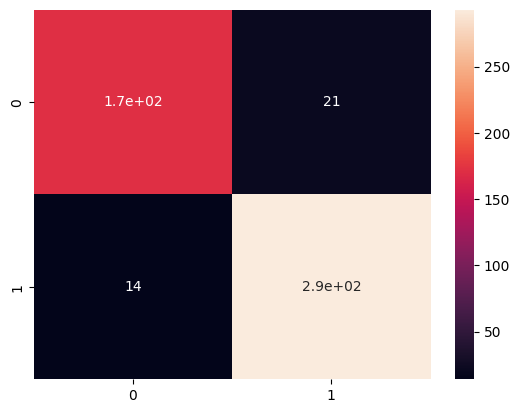

In [35]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [36]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



## Predicting a Sample

In [38]:
df.iloc[0]

age               33.0
physical_score    40.7
test_result        1.0
Name: 0, dtype: float64

In [39]:
sample = df.iloc[0][:-1]

In [40]:
label = df.iloc[0,-1]

In [41]:
label

1

In [42]:
df.iloc[0,:-1]

age               33.0
physical_score    40.7
Name: 0, dtype: float64

In [43]:
sample

age               33.0
physical_score    40.7
Name: 0, dtype: float64

In [44]:
sample.values

array([33. , 40.7])

In [45]:
sample.values.reshape(1, -1)

array([[33. , 40.7]])

#### Prediction of the Sample:

In [46]:
# the probabilities of each classes:
model.predict_proba(sample.values.reshape(1, -1))

array([[0., 1.]])

In [47]:
# 0% probability of 0 class
# 100% probability of 1 class

In [48]:
model.predict(sample.values.reshape(1, -1))

array([1])

# Evaluating Curves and AUC

In [49]:
from sklearn.metrics import precision_recall_curve

In [50]:
# from sklearn.metrics import plot_precision_recall_curve

In [51]:
# from sklearn.metrics import plot_roc_curve

In [54]:
pd.DataFrame(precision_recall_curve(y_test, y_pred))

,0,1,2
0,0.614,0.933121,1.0
1,1.000,0.954397,0.0
2,0.000,1.000000,NaN
